## Deutsch Jozsa Algorithm

We will go step by step to first discuss the Deutsch Algorithm and then extend our understanding to appreciate the power of Deutsch Jozsa Algorithm. 

We first clarify some definitions with propr examples: 

1. _Balanced and Constant Function:_ 
Consider a function that accepts single bit as input and produces single bit as output. As $x\in \{0, 1\}$, there are only 4 options that can act on this set and give us single bit as output. a) Identity function 
$f(x) = \begin{cases} 0, \, \text{for}\, x=0\\  1, \, \text{for}\, x=1\end{cases}$. b) Bit-flip function $f(x) = \begin{cases} 1, \, \text{for}\, x=0\\  0, \, \text{for}\, x=1\end{cases}$,  c) $f(x) = 0$, d) $f(x) = 1$.   

Option a, b are examples of balanced function and c, d are examples of constant function. 

2. _Action of Hadamard Gate:_ Consider state $|0\rangle$ and applying H gate twice will bring us back to the original state, same for state $|1\rangle$.  

3. _Results of Hadamard Gates on Multiple Qubits:_ This is already discussed before and you can check [the notebook](https://github.com/suvoooo/Qubits-Qiskit/blob/master/Hadamard_Superposition.ipynb) for more detail. We will use the results from there. Application of $H^{\otimes n}$ to a product state with $n$ copies of $|0\rangle$ is - $H^{\otimes n} \left(|0\rangle ^{\otimes n} \right) = \frac{1}{\sqrt{2^{n}}} \, \sum \limits_{x\in \{0, 1\}^n} |x\rangle$. Meanwhile $H\otimes H |1\rangle |1\rangle = \frac{1}{2} \sum \limits _{x\in \{0, 1\}^2} \left(-1\right)^{x_0 \oplus x_1} |x\rangle$. Here $|x\rangle$ is a 2-qubit state of the form $|x_0 x_1\rangle $ where $x_0, x_1$ are either 0 or 1. 

4. Understand what happens if we place a randomly intialized qubit between two qubits compared to a qubit in certain state $\left(|0\rangle, |1\rangle\right)$. From there we develop a single bit Deutsch algorithm and extend it to nbit Deutsch-Jozsa algorithm.   

In [ ]:
!pip3 install qiskit
import qiskit as q
 

In [ ]:
!pip3 install pylatexenc

In [ ]:
import math 
import numpy as np

In [ ]:
statevec_sim = q.Aer.get_backend("statevector_simulator")

def statevec_exec(circ):
  statevec = q.execute(circ, backend=statevec_sim).result().get_statevector()
  return statevec

In [ ]:
# qr = q.QuantumRegister(2, name="q")
# cr = q.ClassicalRegister(2, name="cr")

def build_circ(num_qbits, num_cbits):
  qr = q.QuantumRegister(num_qbits)
  cr = q.ClassicalRegister(num_cbits)
  final_circ = q.QuantumCircuit(qr, cr)
  return final_circ, qr, cr

# simple_circuit, qr, cr = build_circ(2)
# simple_circuit.draw()

In [ ]:
def h_gates(qcirc, a, b): # 2 inputs and h gates in parallel
  qcirc.h(a)
  qcirc.h(b)   

In [ ]:
#### start of by applying a rotation around y axis 

simple_circuit, qr, cr = build_circ(2, 2)

simple_circuit.ry(np.pi/6, qr[0])
simple_circuit.ry(np.pi/6, qr[1])
simple_circuit_statevec = statevec_exec(simple_circuit)

simple_circuit.measure([0,1], [0,1]) 


simple_circuit.draw()

┌─────────┐┌─┐   
q50_0: ┤ RY(π/6) ├┤M├───
       ├─────────┤└╥┘┌─┐
q50_1: ┤ RY(π/6) ├─╫─┤M├
       └─────────┘ ║ └╥┘
 c1: 2/════════════╩══╩═
                   0  1

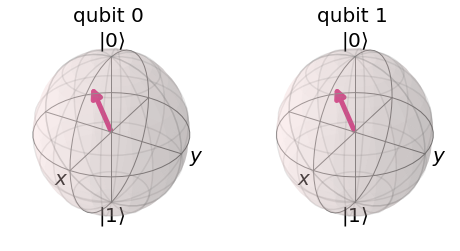

In [ ]:

q.visualization.plot_bloch_multivector(simple_circuit_statevec)

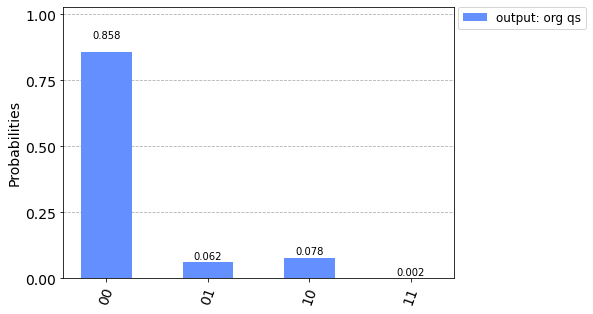

In [ ]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
orig_counts = q.execute(simple_circuit, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([orig_counts], legend=['output: org qs'])

### Random Qubits But H gates in Front

In [ ]:
hadamard_front, qr1, cr1 = build_circ(2, 2)
hadamard_front.draw()

q64_0: 
       
q64_1: 
       
 c2: 2/

In [ ]:
h_gates(hadamard_front, qr1[0], qr1[1])
hadamard_front.ry(math.pi/6, qr1[0])
hadamard_front.ry(math.pi/6, qr1[1])
hadamard_front_statevec = statevec_exec(hadamard_front)
hadamard_front.measure([0,1], [0,1])
hadamard_front.draw()

┌───┐┌─────────┐┌─┐   
q64_0: ┤ H ├┤ RY(π/6) ├┤M├───
       ├───┤├─────────┤└╥┘┌─┐
q64_1: ┤ H ├┤ RY(π/6) ├─╫─┤M├
       └───┘└─────────┘ ║ └╥┘
 c2: 2/═════════════════╩══╩═
                        0  1

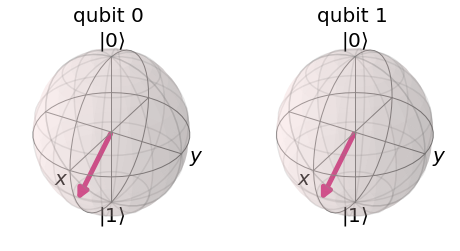

In [ ]:
q.visualization.plot_bloch_multivector(hadamard_front_statevec)

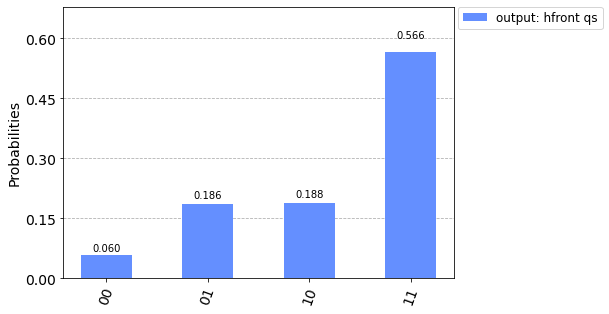

In [ ]:
#qasm_sim = q.Aer.get_backend('qasm_simulator')
hfront_counts = q.execute(hadamard_front, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([hfront_counts], legend=['output: hfront qs'])

### Hadamard at Both Ends of Random Qubit

In [ ]:
hadamard_front_back, qr2, cr2 = build_circ(2, 2)
h_gates(hadamard_front_back, qr2[0], qr2[1])
hadamard_front_back.ry(math.pi/6, [qr2[0]])
hadamard_front_back.ry(math.pi/6, [qr2[1]])
h_gates(hadamard_front_back, qr2[0], qr2[1])
#hadamard_front.barrier()
hadamard_front_back_statevec = statevec_exec(hadamard_front_back)
hadamard_front_back.measure([0,1], [0,1])
hadamard_front_back.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q83_0: ┤ H ├┤ RY(π/6) ├┤ H ├┤M├───
       ├───┤├─────────┤├───┤└╥┘┌─┐
q83_1: ┤ H ├┤ RY(π/6) ├┤ H ├─╫─┤M├
       └───┘└─────────┘└───┘ ║ └╥┘
 c3: 2/══════════════════════╩══╩═
                             0  1

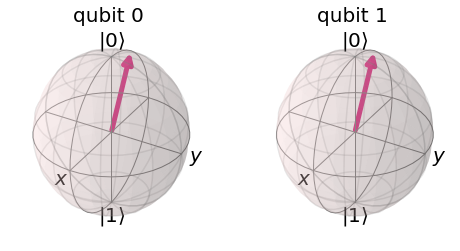

In [ ]:

q.visualization.plot_bloch_multivector(hadamard_front_back_statevec)

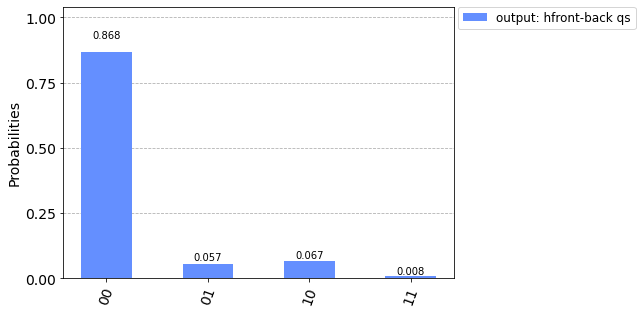

In [ ]:
 
hfront_back_counts = q.execute(hadamard_front_back, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([hfront_back_counts], legend=['output: hfront-back qs'])

### Deutsch Algorithm (Determine a single bit function as constant or balanced)


First we consider an unitary operation $U_f$ which acts on 2 qubits and leave first qubit as it is but perform Xclusive-Or on the 2nd qubit 

$U_f|x\, y\rangle = |x, y\oplus f(x)\rangle....\, (1)$

If we consider CNOT gate then $f(x)$ is basically a bit flip function. 

As $|x\rangle$ can be in a superposition state let's create such superposition state by starting from $|0\rangle$ and applying a  Hadamard Gate, so that now we have $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$. Let's apply our unitary operation on the state $\frac{|0\rangle + |1\rangle}{\sqrt{2}}|0\rangle$. 

$U_f \frac{|0\rangle + |1\rangle}{\sqrt{2}}|0\rangle = \frac{|0,\, 0\oplus f(0) \rangle+ |1, \, 0\oplus f(1)\rangle}{\sqrt{2}}....\,(2)$

This expression is important because with one query we can get information about every possible value of $f(x)$ in a single step $(x\in {0, 1})$. Deutsch's algorithm uses the fact this system is in a state of superposition and obtain information about a global property of the function --- if $f(x)$ is constant or balanced. This information can be obtained by calculating the following-- 

$\psi = (H\otimes I) U_f \, (H\otimes H) |0\rangle |1\rangle ....\, (3)$. 

We have already done $(H\otimes H) |0\rangle |1\rangle$ this before which is -- $\frac{1}{2} (|00\rangle - |01\rangle + |10\rangle - |11\rangle)$. This will be input to our unitary operator $U_f$ and we will have all possible combination of $x, f(x)$. Let's apply $U_f$ term by term 

$U_f|00\rangle = |0, 0\oplus f(0)\rangle$, depending on whether $f(0) = 1$ or $f(0) = 0$, we have either $|00\rangle$ or $|01\rangle$. We can combine this as-- 

$U_f|00\rangle = |0, 0\oplus f(0)\rangle = |0, f(0)\rangle$. 

Similarly, action of $U_f$ on the remaining terms can be summarized as below-- 

$U_f|01\rangle = |0, 1\oplus f(0)\rangle, \, U_f|10\rangle = |1, 0\oplus f(1)\rangle = |1, f(1)\rangle,\, \, U_f|11\rangle = |1, 1\oplus f(1)\rangle$. 

So now we have --- 

$\frac{1}{2} \left(|0\rangle |f(0)\rangle - |0\rangle |1\oplus f(0)\rangle + |1\rangle |f(1)\rangle - |1\rangle |1\oplus f(1)\rangle \right)....\, (4)$


------------------------------------------------------------------------------

_Constant Function Case:_ First let's consider $f(0)=f(1)$ i.e. $f(x)$ is constant.  

The expression above (4) reduces to -- 

$\frac{1}{2} \left((|0\rangle + |1\rangle)\otimes |f(0)\rangle - (|0\rangle + |1\rangle) \otimes |1\oplus f(0)\rangle  \right)  = \frac{1}{2} (|0\rangle + |1\rangle)\otimes (|f(0)\rangle -|1\oplus f(0) \rangle)....\, (5.1)$ 

We now need to apply $(H\otimes I)$ to the expression above. Here we recall $H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle,\, H|+\rangle = |0\rangle ;\,  $

Finally we have ---

$\frac{1}{\sqrt{2}}\left(|0\rangle \otimes (|f(0)\rangle -|1\oplus f(0) \rangle)\right)....\, (6.1)$

This is important as first qubit is exactly in state $|0\rangle$ and measuring it on standard basis will yield 0 with certainty  

-----------------------------------------------------------------------------

_Balanced Function Case:_ Here we consider $f(0)\neq f(1)$. Since $f(x)$ is a binary function, we will have  $1\oplus f(0) = f(1); \, 1\oplus f(1) = f(0)$. Using this, we can reduce equation (4) as below ---

$\frac{1}{2} \left((|0\rangle - |1\rangle)\otimes (|f(0)\rangle - |f(1)\rangle \right)....\, (5.2)$. 

Applying $(H\otimes I)$ to this we guess ---

$\frac{1}{\sqrt{2}}\left(|1\rangle \otimes (|f(0)\rangle - |f(1)\rangle\right)....\, (6.2)$.

By comparing with equation (6.1), we see that when function is balanced measuring the first qubit (which is in state $|1\rangle$) after performing the operation described in equation (3), we will get 1 with certainty. 

Thus If $f(x)$ is constant,  the algorithm outputs 0,  and if $f(x)$ is balanced,  the algorithm outputs 1. Thus, the algorithm decides whether $f(x)$ is constant or balanced, using just a single query. 

### Phase Kickback

Consider for any $x\in \{0, 1\}$, action of $U_f$ on the state $|x\rangle|-\rangle$. 

$U_f |x\rangle|-\rangle = \frac{1}{\sqrt{2}}\left(|x\rangle|f(x)\rangle - |x\rangle|1\oplus f(x)\rangle \right)$, as $|0\oplus f(x)\rangle = |f(x)\rangle$. 

$U_f |x\rangle|-\rangle = \frac{1}{\sqrt{2}} |x\rangle \otimes (|f(x)\rangle - |1\oplus f(x)\rangle)$. 

When $f(x) = 0$, we get $U_f |x\rangle|-\rangle = |x\rangle |-\rangle$; when $f(x) = 1, U_f |x\rangle|-\rangle = -|x\rangle |-\rangle$, i.e. -1 global phase factor has been produced. 

This can be summarized as --- $U_f |x\rangle|-\rangle = (-1)^{f(x)} \, |x\rangle |-\rangle$. 

let's utilize this for the Deutsch algorithm. In previous section equation 3, we consdier the operation, $H\otimes H |0\rangle |1\rangle = |+\rangle|-\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle|-\rangle + |1\rangle |-\rangle \right)$. Here when we apply the unitary operator $U_f$, we can apply phase kickback rule.   

$U_f\, (H\otimes H) |0\rangle |1\rangle = U_f\, \left(|0\rangle|-\rangle + |1\rangle |-\rangle \right) = (-1)^{f(0)} |0\rangle|-\rangle + (-1)^{f(1)}|1\rangle |-\rangle$. 

Now we understand the utility of phase kickback trick --- 

When $f(x)$ is constant i.e. $f(0) = f(1)$, then $(-1)^{f(0)}|+\rangle |-\rangle$. Applying H gate to the first qubit gives us $(-1)^{f(0)}|0\rangle|-\rangle$. Measuring the first qubit yields $|0\rangle$ with certainty. When $f(x)$ is balanced we can't take out the $(-1)$ factor but we will get an overall factor of $\pm 1$, thus $U_f\, (H\otimes H) |0\rangle |1\rangle = \pm |-\rangle |+\rangle$ for balanced case. Applying H gate to the first qubit yields $\pm |1\rangle |+\rangle$. Measuring the first qubit certainly gives us --- 1.  

### Deutsch-Jozsa Algorithm (Generalizing Deutsch Algorithm for N qubits)

Circuit diagram for Deutsch Jozsa algorithm is as below--  

![deutsch](https://drive.google.com/uc?id=1y5ic-tIEobOUxQX2-IRviJeR_oyuNffK)


We have $n$ qubits intitialized to $|0\rangle$ and another one initialized to $|1\rangle$. Hadamard gates are applied to each input. We already know the result of action of $n$ H gates in parallel to $n$ inputs initialized to $|0\rangle$.  It is described in the previous [notebook](https://nbviewer.jupyter.org/github/suvoooo/Qubits-Qiskit/blob/master/Hadamard_Superposition.ipynb). 

$H^{\otimes n} (|0\rangle ^{\otimes n}) = \frac{1}{\sqrt {2^n}}\, \sum \limits _{x\in \{0, 1\}^n}\, |x\rangle .... (7)$. 

Our input is of the form -- 

$H^{\otimes n} (|0\rangle ^{\otimes n}) \otimes \left(H|1\rangle\right)= \frac{1}{\sqrt {2^n}}\, \sum \limits _{x}\, |x\rangle \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)....(8)$. 

We then apply $U_f$ which turns $|x, y\rangle$ to $|x, y\oplus f(x)\rangle$. Important to note that $|0 \oplus f(x)\rangle = |f(x)\rangle$. After applying $U_f$ we have --- 

$\frac{1}{\sqrt{2^{n+1}}}\, \sum |x\rangle \left(|f(x)\rangle - (|1\oplus f(x)\rangle)\right) = \frac{1}{\sqrt{2^{n+1}}}\, \sum  (-1)^{f(x)}\, |x\rangle \,  (|0\rangle - |1\rangle)....(9)$. 

After the unitary operation with $U_f$, applying H gate to $n$ qubit state $|x\rangle$ gives ---

$H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}}\sum \limits _y (-1)^{x\cdot y} |y\rangle$. 

So the final output is --- 

$\frac{1}{2^n} \sum \limits _x \sum \limits _y (-1)^{x\cdot y + f(x)} |y\rangle \, \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)....(10)$. 

Here $x\cdot y$ is sum of bitwise product i.e. $x_0y_0\oplus x_1y_1 \oplus x_2 y_2.....$. 

Since we are measuring only $|y\rangle$ part of the equation (4), let's consider the probability of measuring $|0\rangle ^{\otimes n}$, which is actually our state $|y\rangle$. Here if $f(x)$ is balanced then for half the terms it is 0 and for half it is 1. Thus We will get a zero amplitude of getting output $|0\rangle ^{\otimes n}$. We will only get an outcome of $|0\rangle ^{\otimes n}$ when $f(x)$ is constant. 




#### Creating a Balanced Oracle 

In the [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html) a fine example is given on how to create a balanced oracle. Let's follow the steps there. For balanced oracle as we know, for half the inputs the output is zero and for remaining half it is 1. 

Let's consider 3 input bits, best way to create a balanced oracle is by applying a CNOT gate to each qubit in register 1 target qubit is in register 2 (output). Let's see the pic below--- 

![](https://drive.google.com/uc?id=1rFk-lC6G-7CxHO_n0xv9NtwGAXM2clq0). 

For this circuit when our inputs are 000, 011, 101, 110 we get 0, and when inputs are 001, 010, 100, 111 we get 1. 

We can also modify the circuit by wrapping with X gates as below-- 
![](https://drive.google.com/uc?id=1WVbUfnFY1otCYbbIymWajLWJAf_SZRHJ)

Here, we get 0 and 1 as outputs for exactly the opposite set of inputs in the previous circuit. Let's use this as our balanced oracle. 

### Testing Deutsch Jozsa Algorithm Using Qiskit 

In [ ]:
num_input = 3 

balanced_circuit = q.QuantumCircuit(num_input+1) # num_input + one more where qubit is initialized to |1>

### we can create the balanced oracle by applying CNOT gate to every input and/or by wrapping the second CNOT gate with X gates 

x_str = "010" # this is for iterating over the string and add X gate when there's 1. 

for n in range(len(x_str)):
  if x_str[n]=="1":
    balanced_circuit.x(n)
balanced_circuit.draw()    

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────

In [ ]:
### add control not for all the inputs 

balanced_circuit.barrier()

for i in range(num_input):
  balanced_circuit.cx(i, num_input)
balanced_circuit.barrier()
balanced_circuit.draw()  

░                 ░ 
q_0: ──────░───■─────────────░─
     ┌───┐ ░   │             ░ 
q_1: ┤ X ├─░───┼────■────────░─
     └───┘ ░   │    │        ░ 
q_2: ──────░───┼────┼────■───░─
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [ ]:
### add another x gate

for n in range(len(x_str)):
  if x_str[n]=="1":
    balanced_circuit.x(n)
balanced_circuit.draw()    

░                 ░      
q_0: ──────░───■─────────────░──────
     ┌───┐ ░   │             ░ ┌───┐
q_1: ┤ X ├─░───┼────■────────░─┤ X ├
     └───┘ ░   │    │        ░ └───┘
q_2: ──────░───┼────┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [ ]:
init_circuit, qr, cr = build_circ(num_input+1, num_input)

### all the input qubits  are initialized to 0, while the target qubit is initialized to 1. 

for n in range(num_input):
  init_circuit.h(n)

init_circuit.x(qr[num_input]) # state is now initialized to |1>
init_circuit.h(qr[num_input])
init_circuit.draw()  

┌───┐     
q0_0: ┤ H ├─────
      ├───┤     
q0_1: ┤ H ├─────
      ├───┤     
q0_2: ┤ H ├─────
      ├───┤┌───┐
q0_3: ┤ X ├┤ H ├
      └───┘└───┘
c0: 3/══════════

In [ ]:
complete_circuit = init_circuit.compose(balanced_circuit)
complete_circuit.draw()

┌───┐      ░                 ░      
q0_0: ┤ H ├──────░───■─────────────░──────
      ├───┤┌───┐ ░   │             ░ ┌───┐
q0_1: ┤ H ├┤ X ├─░───┼────■────────░─┤ X ├
      ├───┤└───┘ ░   │    │        ░ └───┘
q0_2: ┤ H ├──────░───┼────┼────■───░──────
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q0_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
      └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c0: 3/════════════════════════════════════

In [ ]:
## now we add h gates again to the input qubits 

for n in range(num_input):
  complete_circuit.h(n)

complete_circuit.barrier()

# Now we measure the input qubits 

for n in range(num_input):
  complete_circuit.measure(n, n)

complete_circuit.draw()  

┌───┐      ░                 ░ ┌───┐      ░ ┌─┐      
q0_0: ┤ H ├──────░───■─────────────░─┤ H ├──────░─┤M├──────
      ├───┤┌───┐ ░   │             ░ ├───┤┌───┐ ░ └╥┘┌─┐   
q0_1: ┤ H ├┤ X ├─░───┼────■────────░─┤ X ├┤ H ├─░──╫─┤M├───
      ├───┤└───┘ ░   │    │        ░ ├───┤└───┘ ░  ║ └╥┘┌─┐
q0_2: ┤ H ├──────░───┼────┼────■───░─┤ H ├──────░──╫──╫─┤M├
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘      ░  ║  ║ └╥┘
q0_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
      └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c0: 3/═════════════════════════════════════════════╩══╩══╩═
                                                   0  1  2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/'

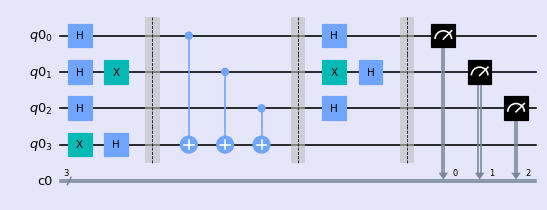

In [ ]:
style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}

complete_circuit.draw(output='mpl',scale=0.8, style=style, filename=path+'DJ_Circ_balanced.png')

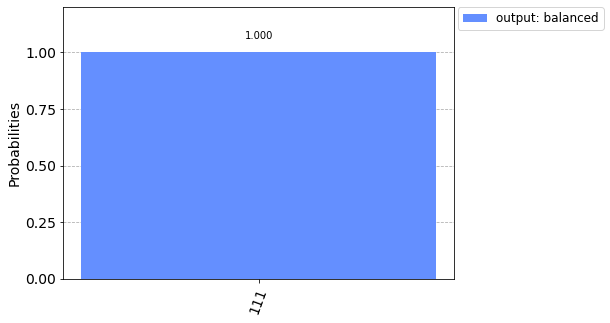

In [ ]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
balanced_counts = q.execute(complete_circuit, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([balanced_counts], legend=['output: balanced'])

### 0% chance of predicting 000, i.e. oracle is balanced.  

In [ ]:
### let's use IBM Quantum Computer to simulate this, 

from qiskit import IBMQ

IBMQ.save_account('find your token')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

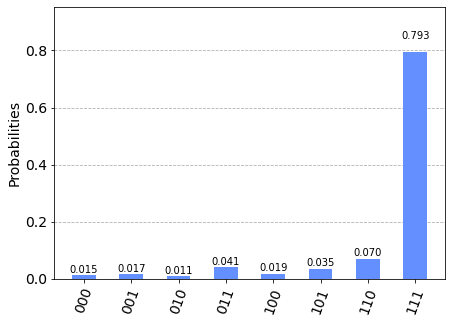

In [ ]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_athens') # check which computer has 0 jobs on queue
job = q.execute(complete_circuit, backend=qcomp)
q_result = job.result()

q.visualization.plot_histogram(q_result.get_counts(complete_circuit))

Testing DJ algorithm with a balanced oracle, on a quantum computer shows us that most likely result is 111. Compared to the simulated case the real device is still susceptible to quantum noise and thus we can see components other than $|111\rangle$ are present too. 